In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Setup

## Load data into dataframes
Since we are not able to measure accuracy with test data, we split the training data into train/validate dataset and use validate data to measure the accuracy of the model. We will split the data into the following sets of data

- Training size: 11994
- Validation size: 2999
- Test Size: 3948

Note: Incase of a profile that represents a group of pets, AdoptionSpeed is the speed which all of the pets are adopted. A feature could be created as a the adoption speed would differ greatly given the number of pets in a profile.

Dataframe *x_test* does not contain target variable of "AdoptionSpeed" as AdoptionSpeed is used by kaggle to evalualte the accuracy of the model.

In [2]:
# Read data
train_df = pd.read_csv('../input/train/train.csv')
x_test = pd.read_csv('../input/test/test.csv')

## Feature creations
Features created based on EDA presented below

Created feature will be in snakecase and underscores. Existing features will be in camelcase

- A categorical feature 'pet_profile' indicating the profile is a single pet or individual pet ('Individual'= Single Pet, 'Group'= More than 1 pet)
- age_in_year: age of pets represented in years instead of months


In [3]:
# Create a feature representing individual or group of pets
train_df['pet_profile'] = train_df['Quantity'].apply(lambda x: 'Individual' if x == 1 else 'Group')

# Bin months into years
years = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
train_df['age_in_year'] = pd.cut(train_df['Age'], 22, labels=years)

In [4]:
# Split training data into trianing and validation dataset
x_train, x_validate, y_train, y_validate = train_test_split(train_df, train_df['AdoptionSpeed'], test_size=0.2)

print ('Training size:', len(x_train))
print ('Validation Size:', len(x_validate))
print ('Test Size:', len(x_test))

Training size: 11994
Validation Size: 2999
Test Size: 3948


# Mapping values

In [5]:
# Rename values for easier visualisation
type_map = {1: 'Dog', 2: 'Cat'}
gender_map = {1: 'Male', 2: 'Female', 3: 'Mixed'}

train_df['Gender'] = train_df['Gender'].map(gender_map)
train_df['Type'] = train_df['Type'].map(type_map)

In [6]:
color_lables_df = pd.read_csv('../input/color_labels.csv')
keys = color_lables_df.ColorID
values = color_lables_df.ColorName

color_map = dict(zip(keys,values))
print(color_map)
train_df['Color1_map'] = train_df['Color1'].map(color_map)
print(train_df.Color1_map.unique())

{1: 'Black', 2: 'Brown', 3: 'Golden', 4: 'Yellow', 5: 'Cream', 6: 'Gray', 7: 'White'}
['Black' 'Brown' 'Cream' 'Gray' 'Golden' 'White' 'Yellow']


In [7]:
# Create helper method to visualise data
def visualise_count_plot(df, x_axis_column, title=None, split_by=None, show_percentage=False):
    # Plot title
    if title is not None:
        plt.title(title)
    
    # Size of rows in dataframe
    total = len(df)
    ax = sns.countplot(data=df, x=x_axis_column, hue=split_by)
    if show_percentage is True:   
        for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center")
    plt.show()


def visualise_histogram_plot(df, x_axis_column, title=None, kde=False):
    if title is not None:
        plt.title(title)
    sns.distplot(df[x_axis_column], kde=kde)
    plt.show()

# Type
Breakdown of the number of cats and dogs

Type of animal (1 = Dog, 2 = Cat)

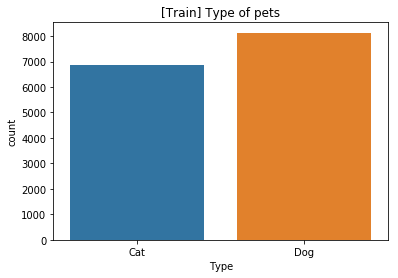

In [8]:
# Number of cats and dogs
visualise_count_plot(train_df, 'Type', '[Train] Type of pets')

# Gender
Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)

Pets in a group could contain same gender or multiple gender.

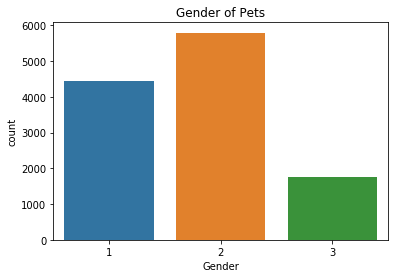

In [9]:
# Display Gender
visualise_count_plot(x_train, 'Gender', 'Gender of Pets')

## Verifying gender
- A profile that contains only 1 pet would not have mixed genders

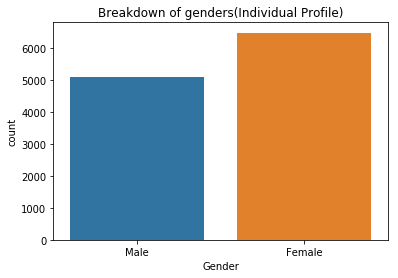

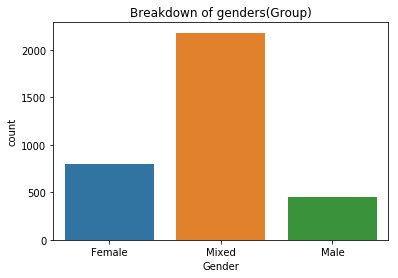

In [10]:
# Dataframe containing only individual pets profile
individual_pets_df = train_df[train_df['pet_profile'] == 'Individual']
visualise_count_plot(individual_pets_df, 'Gender' , title='Breakdown of genders(Individual Profile)')

# Dataframe containing group profile
group_pets_df = train_df[train_df['pet_profile'] == 'Group']
visualise_count_plot(group_pets_df, 'Gender' , title='Breakdown of genders(Group)')

## Adoption Speed by gender
Looking at the adoption speed by gender

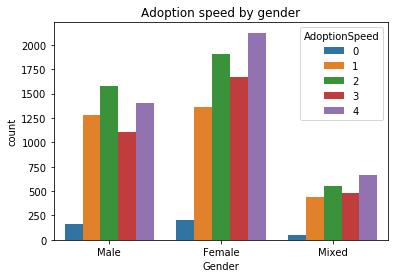

In [11]:
visualise_count_plot(train_df, 'Gender', split_by='AdoptionSpeed', title='Adoption speed by gender')

# AdoptionSpeed

Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.

- 0 - Pet was adopted on the same day as it was listed. 
- 1 - Pet was adopted between 1 and 7 days (1st week) after being listed. 
- 2 - Pet was adopted between 8 and 30 days (1st month) after being listed. 
- 3 - Pet was adopted between 31 and 90 days (2nd & 3rd month) after being listed. 
- 4 - No adoption after 100 days of being listed. (There are no pets in this dataset that waited between 90 and 100 days).
Breakdown of the adoption speed of all pets.


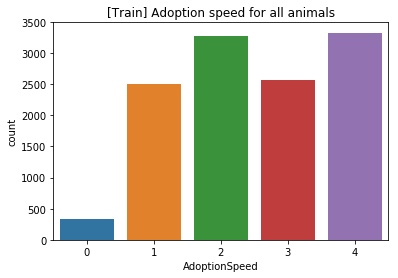

In [12]:
# Adoption rate for all animals
visualise_count_plot(x_train, 'AdoptionSpeed', title='[Train] Adoption speed for all animals')

A possible feature could be created for adoption and no adoption.

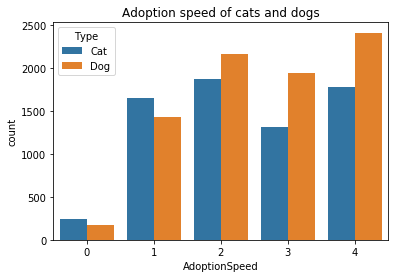

In [13]:
# Display adoption speed of cats dogs
visualise_count_plot(train_df, 'AdoptionSpeed', split_by='Type', title='Adoption speed of cats and dogs')

Cats are more likely to be adopted than dogs, dogs are more likely to get adopted than cats

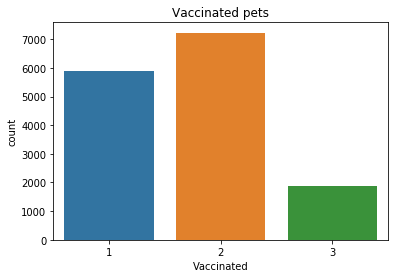

In [14]:
# Display vaccinated
visualise_count_plot(train_df, 'Vaccinated', 'Vaccinated pets')

# Age

Display the distribution of age in the pet profile and the breakdown of adoption speed by age

Age - Age of pet when listed, in months

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


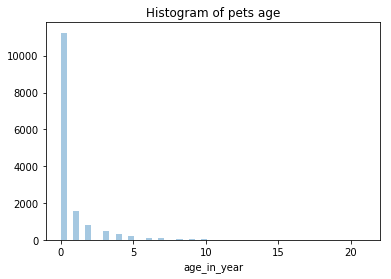

Min: 0 Max: 21


In [15]:
# Display distribution of age of pets
visualise_histogram_plot(train_df, 'age_in_year', title='Histogram of pets age')

print('Min:', min(train_df['age_in_year']), 'Max:', max(train_df['age_in_year']))

### The range of the age of pets is between 0-21 however, after 10 years amount of data goes down significantly.

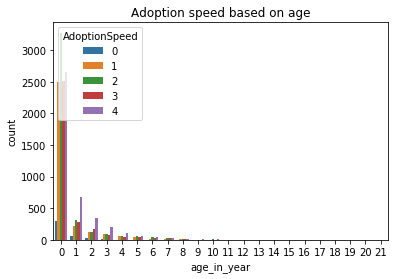

In [16]:
# Display adoption speed by age
visualise_count_plot(train_df, 'age_in_year', split_by='AdoptionSpeed', title='Adoption speed based on age')

# Health
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)

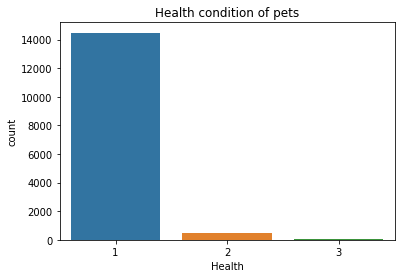

In [17]:
visualise_count_plot(train_df, 'Health', title='Health condition of pets')

# Colors

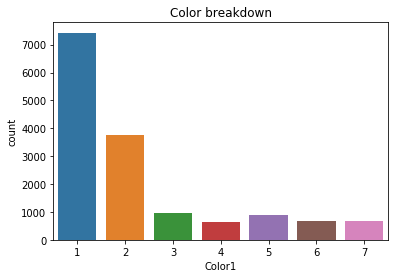

In [18]:
# Display colors
visualise_count_plot(train_df, 'Color1', title='Color breakdown')

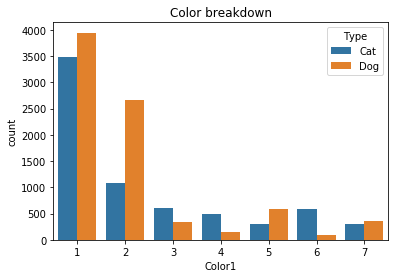

In [19]:
# Display colors by animal
visualise_count_plot(train_df, 'Color1', split_by='Type', title='Color breakdown')

Most of the pets are black and brown in color

# Maturity

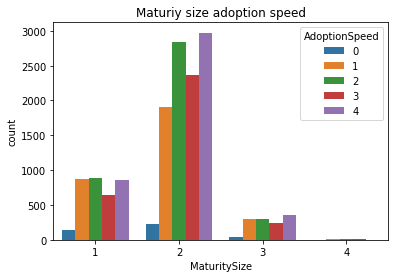

In [20]:
# Size and adoption speed
visualise_count_plot(train_df, 'MaturitySize', split_by='AdoptionSpeed', title='Maturiy size adoption speed')

# Vaccination

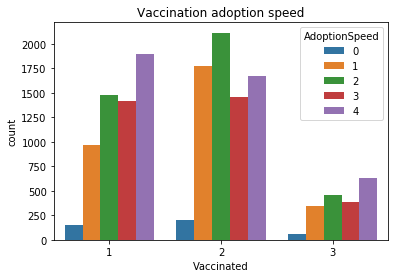

In [21]:
# Vaccination
visualise_count_plot(train_df, 'Vaccinated', split_by='AdoptionSpeed', title='Vaccination adoption speed')

# Sterilized and Vaccinated
Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)

Pets that have been neutured are more likely to be adopted

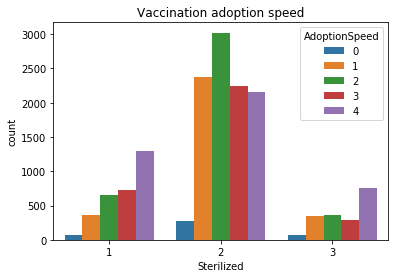

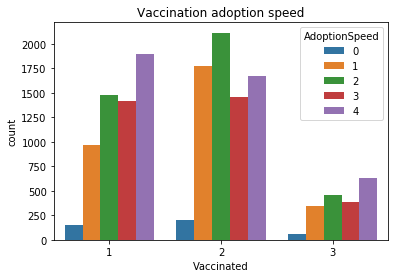

In [22]:
# Sterilized
visualise_count_plot(train_df, 'Sterilized', split_by='AdoptionSpeed', title='Vaccination adoption speed')
visualise_count_plot(train_df, 'Vaccinated', split_by='AdoptionSpeed', title='Vaccination adoption speed')

In [23]:
# Health and dewormed

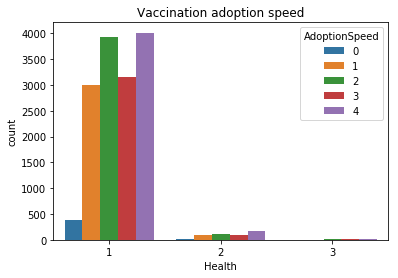

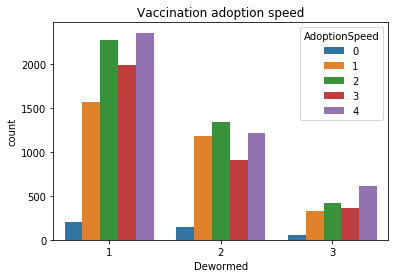

In [24]:
visualise_count_plot(train_df, 'Health', split_by='AdoptionSpeed', title='Vaccination adoption speed')
visualise_count_plot(train_df, 'Dewormed', split_by='AdoptionSpeed', title='Vaccination adoption speed')

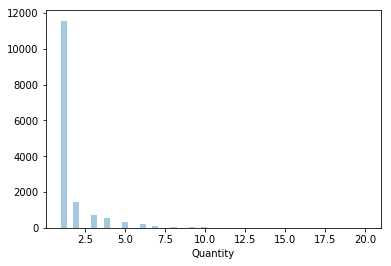

Pets Ranges from 1 to 20


In [25]:
visualise_histogram_plot(train_df, 'Quantity')
print('Pets Ranges from %s to %s' % (train_df['Quantity'].min(), train_df['Quantity'].max()))

Could possibly create a feature in term of individual and groups

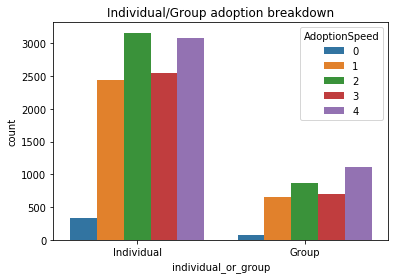

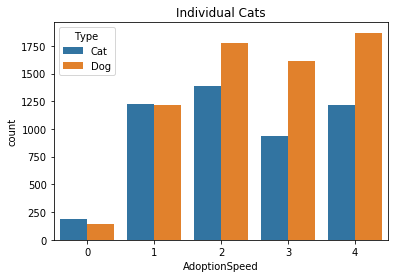

In [26]:
train_df['individual_or_group'] = train_df['Quantity'].apply(lambda x: 'Individual' if x == 1 else 'Group')
individual_cats = train_df[train_df['individual_or_group'] == 'Individual']
visualise_count_plot(train_df, 'individual_or_group', split_by='AdoptionSpeed',title='Individual/Group adoption breakdown')
visualise_count_plot(individual_cats, 'AdoptionSpeed', split_by='Type',title='Individual Cats')

Individual cats have a higher chance of getting adopted earlier

# Photo amount

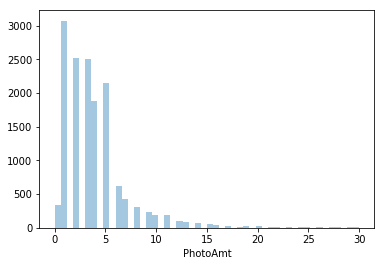

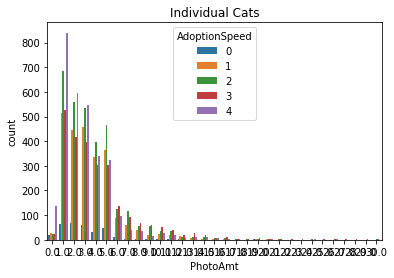

1.0    3075
2.0    2518
3.0    2511
5.0    2147
4.0    1881
Name: PhotoAmt, dtype: int64

In [27]:

visualise_histogram_plot(train_df, 'PhotoAmt')
visualise_count_plot(individual_cats, 'PhotoAmt', split_by='AdoptionSpeed',title='Individual Cats')
train_df['PhotoAmt'].value_counts().head()

# Model

In [28]:
# Select features to be used for model

features = ['Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'MaturitySize', 'Vaccinated', 'Dewormed',
            'Sterilized', 'Health', 'Quantity', 'Fee']
# Rename values for easier visualisation
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 2,'Mixed': 3})
train_df['Type'] = train_df['Type'].map({'Dog': 1, 'Cat': 2})
# Get target from df
y_train = train_df['AdoptionSpeed']
# Load features to use for training
x_train = train_df[[feature for feature in features if feature in train_df.columns]]

# Get features to use for testing dataset
x_test_features = x_test[[feature for feature in features if feature in x_test.columns]]

In [29]:
def decision_tree():
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(random_state=0)
    tree.fit(x_train, y_train)
    print('Accuracy on training {}'.format(tree.score(x_train, y_train)))
    print('Predict {}'.format(tree.predict(x_train)))
    x_test['AdoptionSpeed'] = tree.predict(x_test_features)
    x_test.head()
    submission = x_test[['PetID', 'AdoptionSpeed']]
    submission.to_csv('submission.csv', index=False) 

In [30]:
# Run with LightGBM
def lightgbm():
    import lightgbm as lgb
    params = {}

    params['learning_rate']= 0.002
    params['boosting_type']='gbdt'
    params['objective']='binary'
    params['metric']='binary_logloss'
    params['sub_feature']=0.5
    params['num_leaves']= 15
    params['min_data']=60
    params['max_depth']=15

    # clf= lgb.train(params, d_train, 100)
    clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=15, 
                             random_state=314, 
                             silent=True, 
                             metric='None', 
                             n_jobs=4, 
                             n_estimators=1500,
                             colsample_bytree=0.9,
                             subsample=0.9,
                             learning_rate=0.01)
    clf.fit(x_train, y_train)
    x_test['AdoptionSpeed'] = clf.predict(x_test_features)
    submission = x_test[['PetID', 'AdoptionSpeed']]
    submission.to_csv('submission.csv', index=False) 


In [31]:
def xg_boost():
    import xgboost as xgb
    model1 = xgb.XGBClassifier(
    learning_rate =0.3,
    n_estimators=1500,
    max_depth=10,
    min_child_weight=6,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=1994)

    train_model1 = model1.fit(x_train, y_train)
    x_test['AdoptionSpeed'] = train_model1.predict(x_test_features)
    submission = x_test[['PetID', 'AdoptionSpeed']]
    submission.to_csv('submission.csv', index=False) 


In [32]:
# xg_boost()
lightgbm()

ModuleNotFoundError: No module named 'lightgbm'